<h1 style="color:rgba(77, 38, 87, 1);">Ejercicio de Feedback: Clustering</h1>

# Introducción y planteamiento del problema

"**Ayuda Internacional**" es una ONG humanitaria internacional comprometida con la lucha contra la pobreza y con proporcionar a las personas de países subdesarrollados servicios básicos y ayuda en tiempos de desastres y calamidades naturales. Esta ONG ha logrado recaudar aproximadamente 10 millones de dólares. Este dinero debe ahora asignarse de manera estratégica y eficaz. Por lo tanto, para decidir la selección de los países que más necesitan ayuda, se deben tomar decisiones basadas en datos.

En consecuencia, resulta necesario **categorizar los países utilizando factores socioeconómicos y de salud** que determinen el desarrollo general de cada país. Basándose en estos grupos de países, definidos por sus condiciones, se distribuirán los fondos para brindar asistencia durante desastres y calamidades naturales. Este es un caso claro de clustering, donde se requiere crear grupos de países basados en las diferentes características presentes.

**Objetivo**:


*   Agrupar países en función de características numéricas socioeconómicas.
*   Determinar qué grupos de países requieren ayuda y en qué grado



## Nuestro conjunto de datos




* **country**: Nombre del país.
* **child_mort**: Muertes de niños menores de 5 años por cada 1000 nacidos vivos.
* **exports**: Exportaciones de bienes y servicios per cápita, expresadas como porcentaje del PIB per cápita.
* **health**: Gasto total en salud per cápita, expresado como porcentaje del PIB per cápita.
* **imports**: Importaciones de bienes y servicios per cápita, expresadas como porcentaje del PIB per cápita.
* **Income**: Ingreso neto por persona.
* **Inflation**: Tasa de crecimiento anual del PIB total.
* **life_expec**: Número promedio de años que un recién nacido viviría si se mantienen los patrones actuales de mortalidad.
* **total_fer**: Número de hijos que nacerían por mujer si las tasas actuales de fertilidad por edad permanecen constantes.
* **gdpp**: PIB per cápita, calculado como el PIB total dividido entre la población total.




<h1 style="color:rgba(37, 214, 191, 1);">1. IMPORTS</h1>

In [146]:
# Todos los imports necesitados en todo el notebook (No hay imports en otras celdas)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import kaleido
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

<h1 style="color:rgba(18, 158, 18, 1);">2. Análisis Exploratorio de los datos</h1>

In [147]:
# Cargamos el dataset
df = pd.read_csv("Country-data.csv")

# Mostramos las primeras filas del df
df.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [148]:
# Vamos a mirar las dimensiones del dataset
df.shape

(167, 10)

In [149]:
# Descripción estadística de las variables del dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [150]:
# Información del tipo de dataset y de sus columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<h5 style="color:rgba(35, 22, 223, 1);">============================================================================================</h5>

Según los datos que se pueden apreciar vemos que las escalas de las variables son distintas entre sí, lo que significa que tendremos que normalizar para un mejor rendimiento. Por los valores maximos que se aprecian parece que hay unos cuantos outliers en nuestro dataset. Habria que agrupar las variables para que haya menos dimensiones en nuestro clustering.

<h5 style="color:rgba(35, 22, 223, 1);">============================================================================================</h5>

In [151]:
# Primero de todo vamos a separar la columna "country" del dataset
id_df = df["country"]
df_clean = df.drop("country", axis=1)

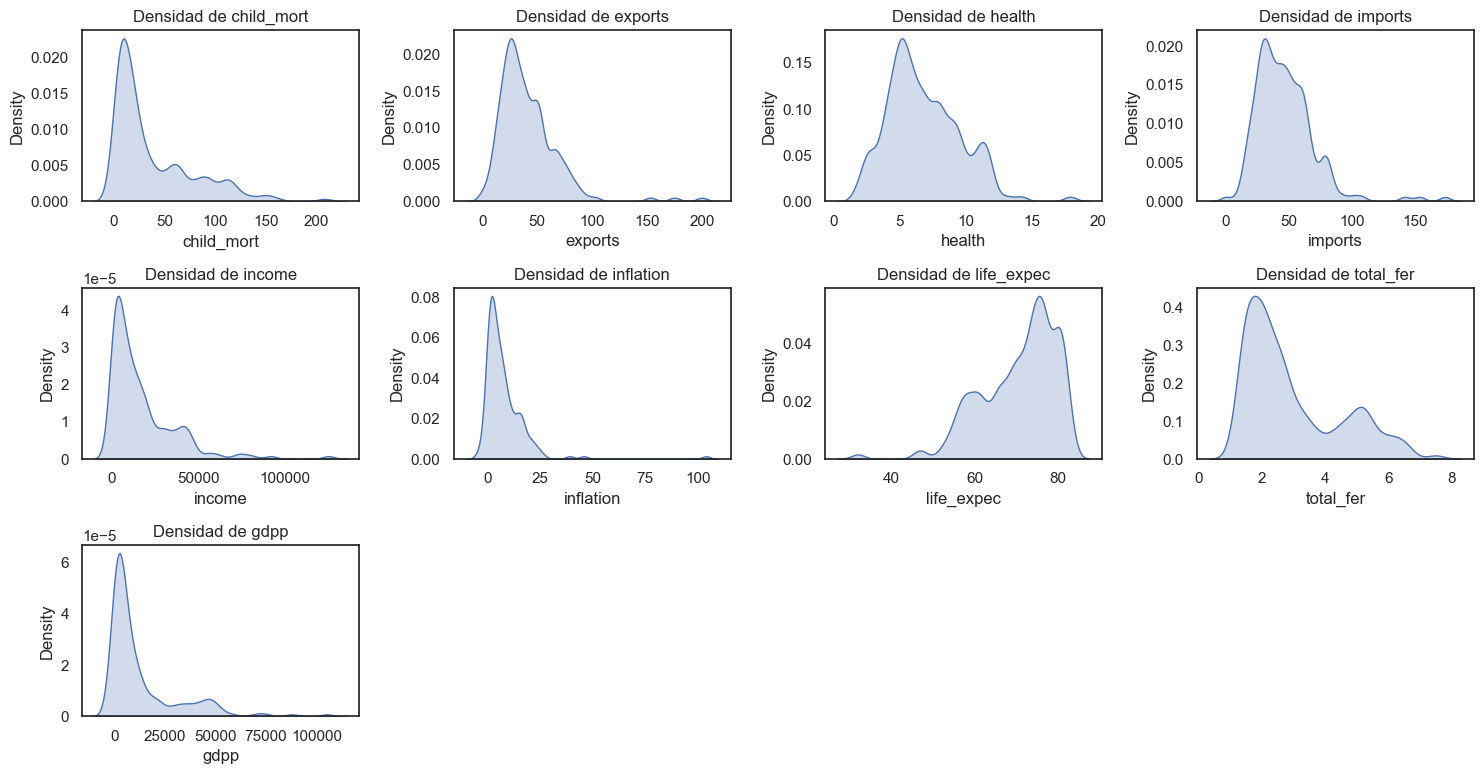

In [152]:
# Visualizamos la distribución de las variables numéricas en formato de grafícas de densidad
plt.figure(figsize=(15, 10))

# Iteramos sobre cada columna numérica para crear una gráfica de densidad
for i, col in enumerate(df_clean):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(df_clean[col], fill=True, bw_adjust=0.5)
    plt.title(f'Densidad de {col}')

plt.tight_layout()
plt.show()

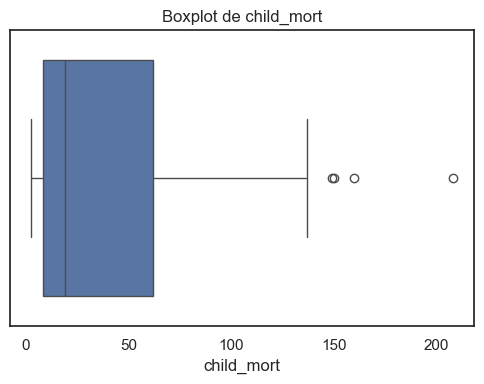

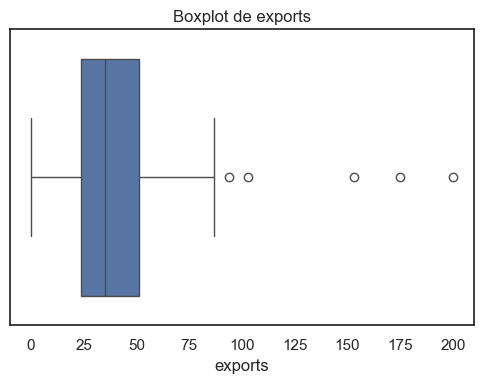

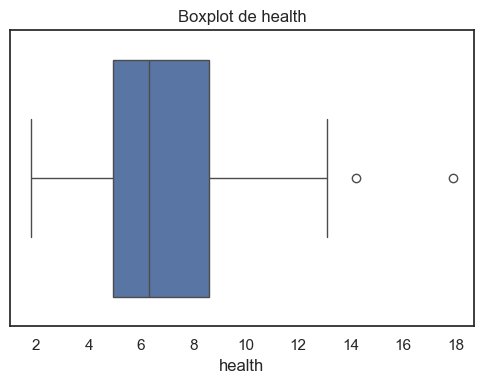

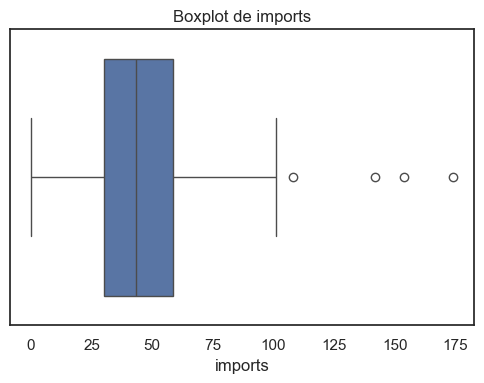

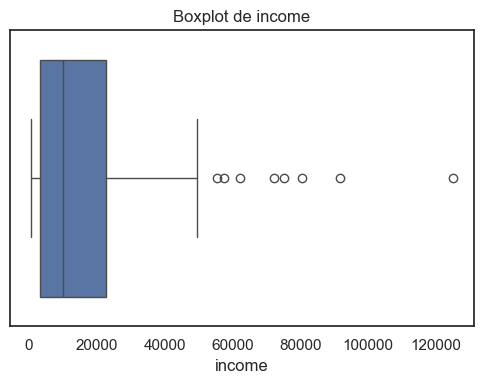

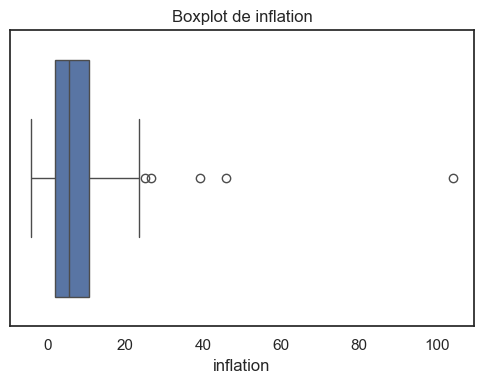

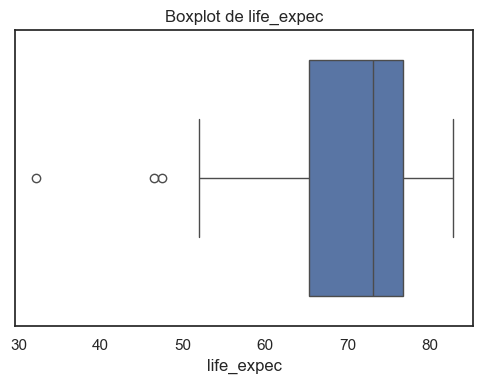

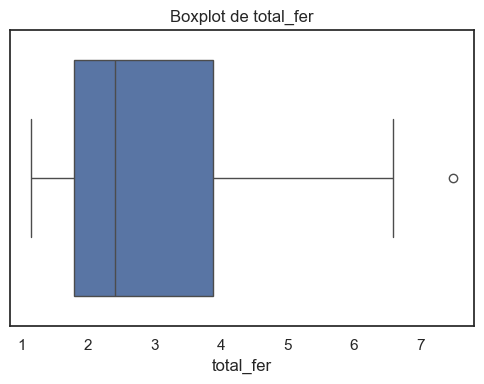

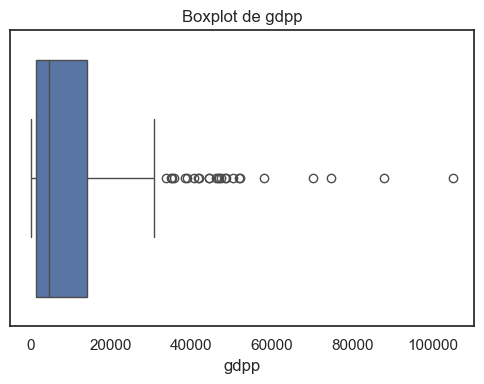

In [153]:
# Hacemos un for para cada columna numerica
for col in df_clean.columns:
    plt.figure(figsize=(5, 4)) 
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot de {col}')
    
    # Mostramos el gráfico
    plt.tight_layout()
    plt.show()

<h5 style="color:rgba(35, 22, 223, 1);">============================================================================================</h5>

Observando las gráficas de densidad histogramas y los boxplots podemos ver que mas o menos están bien repartidos los valores, aunque nos encontramos con varios outliers en cada columna que pueden desfavorecer nuestros modelos finales. En las gráfica de densidad podemos observar que la curva principal siempre suele estar en la parte izquierda (a excepción de life_expec), lo que nos indica que nuestros outliers siempre suelen tener un valor superior a la media. La mayoria tiene una forma de montaña "con escalones" lo que nos indica que a parte de la media tambien hay otros puntos donde se concentran los valores. Ya que tenemos outliers en todas partes, y algunos mas preocupantes que otros, estaria bien eliminarlos o reducirlos de alguna manera para mejorar el aprendizaje del modelo que vayamos a utilizar.

<h5 style="color:rgba(35, 22, 223, 1);">============================================================================================</h5>

<h1 style="color:rgba(223, 219, 22, 1);">3. Extracción de las características</h1>

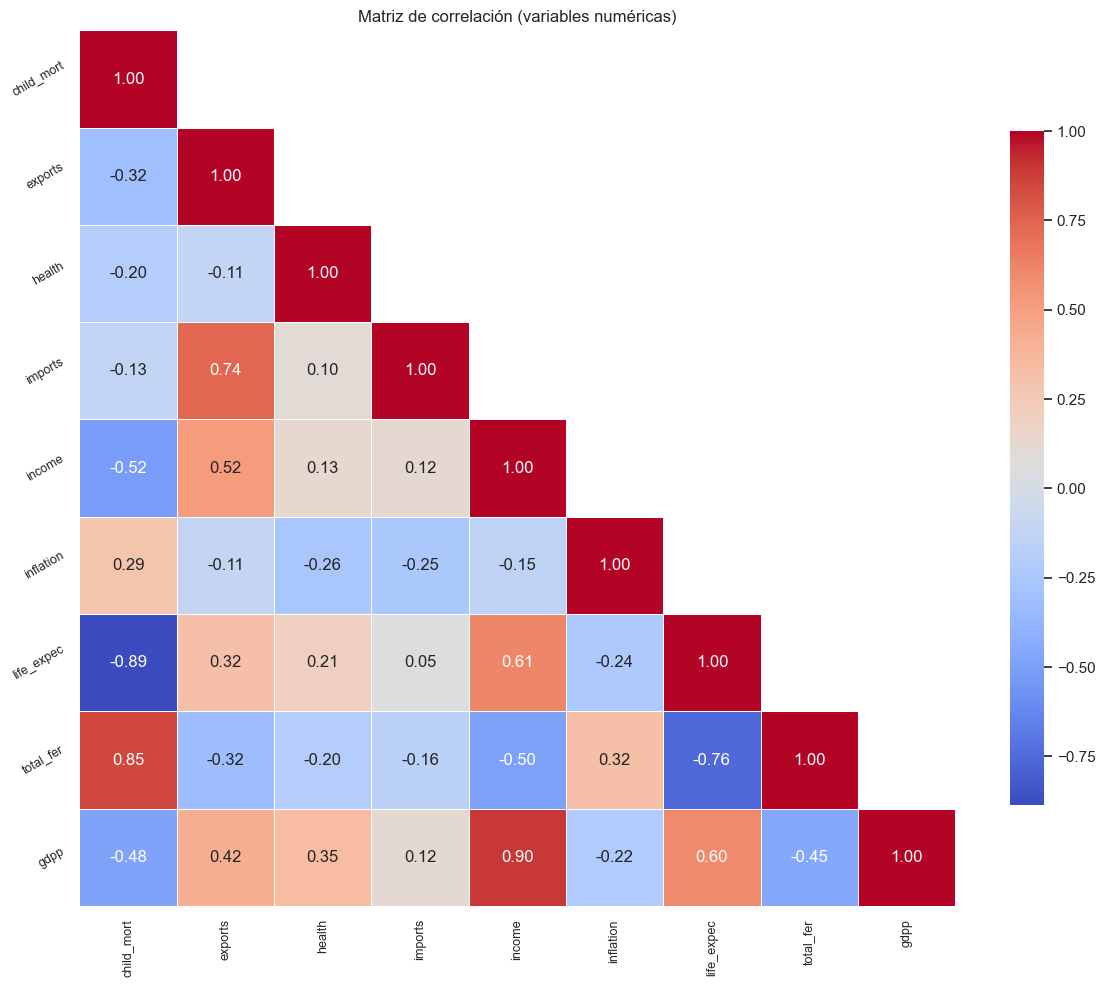

In [154]:
# Visualizamos el Heatmap de correlaciones
corr_matrix = df_clean.corr()

# Enmascaramos el triángulo superior para no duplicar valores
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.set(style="white")  # estilo limpio

# Dibujamos el heatmap
ax = sns.heatmap(
    corr_matrix,
    cmap="coolwarm",          # paleta de colores
    annot=True,               # mostrar coeficientes
    mask=mask,                # aplicar máscara
    fmt=".2f",                # formato numérico
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

# Ajustes de etiquetas
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, fontsize=9)

plt.title("Matriz de correlación (variables numéricas)")
plt.tight_layout()
plt.show()

<h5 style="color:rgba(35, 22, 223, 1);">============================================================================================</h5>

En la matriz de confusión podemos ver que la mayoría tienen relación entre sí. Las que destacan son [income - gdpp, con un 0.9], [total_fer - child_mort, con un 0.85] y por la parte negativa tenemos [life_expec - child_mort, con un -0.89] y [life_expec - total_fer, con un -0.76]. Todas estas fuertes relaciones positivas y negativas tienen sentido entre sí ya que, por ejemplo, lo que ganan esta relacionado con su PIB o, cuanta mas mortalidad haya menos esperanza de vida hay, etc. Pero todas estas relaciones nos permiten agrupar las variables o si quisieramos eliminar alguna para no acabar con overfitting.

<h5 style="color:rgba(35, 22, 223, 1);">============================================================================================</h5>

In [155]:
# Ahora vamos a agrupar las variables en tres grandes como lo indica el enunciado:
# Salud (4 variables), Comercio (2 variables) y Finanzas (3 variables)
var_salud = ["life_expec", "child_mort", "total_fer", "health"]   # Variables escogidas para salud 
var_comercio = ["imports", "exports"]                             # Variables escogidas para comercio
var_finanzas = ["income", "inflation", "gdpp"]                    # Variables escogidas para finanzas

# Creamos las nuevas columnas para cada indicador
# El criterio para sumar o restar es dependiendo si es positivo o negativo para el indicador general
df_clean['Salud'] = (
    (df_clean['life_expec'] / df_clean['life_expec'].mean()) -  # Positivo
    (df_clean['child_mort'] / df_clean['child_mort'].mean()) -  # Negativo
    (df_clean['total_fer'] / df_clean['total_fer'].mean()) +    # Negativo
    (df_clean['health'] / df_clean['health'].mean())            # Positivo
)
df_clean['Comercio'] = (
    (df_clean['imports'] / df_clean['imports'].mean()) +    # Positivo
    (df_clean['exports'] / df_clean['exports'].mean())      # Positivo
)
df_clean['Finanzas'] = (
    (df_clean['income'] / df_clean['income'].mean()) +        # Positivo
    (df_clean['inflation'] / df_clean['inflation'].mean()) +  # Positivo
    (df_clean['gdpp'] / df_clean['gdpp'].mean())              # Positivo
)

# Borramos las columnas originales
df_agrupado = df_clean.drop(columns=var_salud + var_comercio + var_finanzas)
df_agrupado.head(10)

,Salud,Comercio,Finanzas
0,-2.422504,1.200812,1.349645
1,1.048966,1.717580,1.471658
2,0.002385,1.603752,3.165367
3,-3.929096,2.430387,3.494919
4,0.981553,2.362940,2.240150
5,1.079932,0.800976,4.570958
6,0.638233,1.472059,1.637648
7,1.662957,0.927369,6.567153
8,2.154034,2.267305,6.249582
9,0.166487,1.762336,3.157068


In [156]:
# Ya que tenemos valores negativos en una de las variables y las demas en un rango positivo, vamos a estandarizar las variables
scaler = StandardScaler()
df_escalado = pd.DataFrame(scaler.fit_transform(df_agrupado), columns=df_agrupado.columns)
df_escalado.head(10)

,Salud,Comercio,Finanzas
0,-1.384975,-0.726043,-0.641753
1,0.599706,-0.256572,-0.594307
2,0.001363,-0.359982,0.064304
3,-2.246312,0.390996,0.192453
4,0.561166,0.329722,-0.295473
5,0.617410,-1.089284,0.610878
6,0.364886,-0.479622,-0.529760
7,0.950733,-0.974460,1.387114
8,1.231488,0.242840,1.263624
9,0.095183,-0.215912,0.061077


<h5 style="color:rgba(35, 22, 223, 1);">========================================================================================</h5>

Como podemos observar después de hacer la estandarización nuestros valores son mucho mas cercanos entre si y mas pequeños, conservamos nuestros signos (+ o -), que también aparecen en todas las variables ahora, para poder darle un peso mas adecuado a cada dato. Ahora a nuestro modelo le será mucho mas facil hacer calculos.

<h5 style="color:rgba(35, 22, 223, 1);">============================================================================================</h5>

<h1 style="color:rgba(226, 108, 11, 1);">4. Entrenamiento y evaluación del modelo</h1>

<h5 style="color:rgba(35, 22, 223, 1);">========================================================================================</h5>

Para asegurarnos de escoger un modelo bueno vamos a hacer un plot en 3D con todos los valores de nuestras 3 variables y vamos a añadirle colores segun el pais en el cual estén para ver como se representan estos tipos de grupos y poder identificar la forma que crean, lo que nos dará una solución visual a nuestro problema y nos ayudará a escoger modelo.

<h5 style="color:rgba(35, 22, 223, 1);">============================================================================================</h5>

In [157]:
# Unimos los nombres de los países temporalmente para que aparezcan al pasar el ratón
# Usamos .values para asegurar que los índices coincidan si has reseteado el df
fig = px.scatter_3d(
    df_escalado,
    x='Salud',
    y='Comercio',
    z='Finanzas',
    color='Salud',              # El color ayuda a distinguir la profundidad
    hover_name=id_df.values,    # Muestra el país al pasar el ratón
    title='Distribución 3D de Países (Indicadores Escalados)',
    color_continuous_scale='Viridis', # Una paleta clara y profesional
    opacity=0.8
)

# --- MEJORAS DE VISIBILIDAD ---

fig.update_traces(
    marker=dict(
        size=5,                 # Aumentamos un poco el tamaño
        line=dict(width=1, color='DarkSlateGrey') # Borde para que no se solapen visualmente
    )
)

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        aspectmode='cube',            # Fuerza a que el gráfico sea un cubo perfecto
        xaxis_title='Eje Salud',
        yaxis_title='Eje Comercio',
        zaxis_title='Eje Finanzas',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5) 
        )
    ),
    template="plotly_white" # Fondo limpio para que resalten los colores
)

fig.show()

<h5 style="color:rgba(35, 22, 223, 1);">========================================================================================</h5>

Vamos a utilizar KMeans:
Claramente por la forma en la que se agrupan nuestros valores podemos ver que KMeans generaria unos clusters en base a cercania, lo que nos dará exactamente el tipo de agrupación que estamos buscando.
Como solo tenemos 3 variables no necesitamos un algoritmo mas complejo que pueda manejar mas variables, KMeans nos va perfectamente para este caso, ya que es rapido y preciso.

<h5 style="color:rgba(35, 22, 223, 1);">============================================================================================</h5>

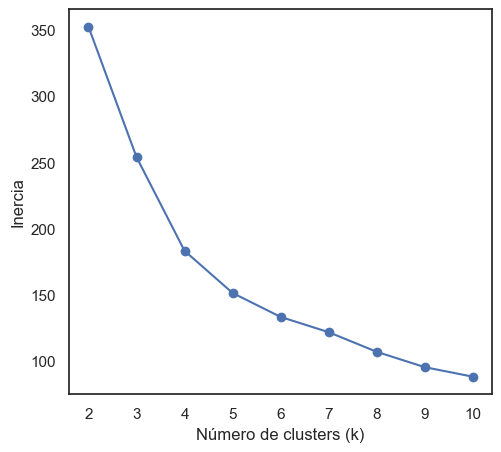

In [158]:
# Ahora que ya tenemos decidido que vamos a utilizar KMeans, vamos a buscar el número óptimo de clusters con el método del codo y silhouette score
sse = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_escalado)
    sse.append(kmeans.inertia_)
    
    # Calculamos el silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_escalado, labels)
    silhouette_scores.append(silhouette_avg)

# Gráfico del método del codo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.plot(K_range, sse, marker='o')

<h5 style="color:rgba(35, 22, 223, 1);">========================================================================================</h5>

Por la silueta anterior podemos determinar que la mejor K a utilizar es K = 3, ya que aunque no es donde se ve que los siguientes valores de K son mucho mas gradientes, una vez hemos visto los resultados en la grafica 3D, vemos que el como se acaban agrupando los paises tiene mas sentido que con K=4. Alomejor tambien se podria utilizar K = 4, pero se ha realizado un test rapido con K = 4 y da peores resultados que la escogida. (El test realizado con K = 4 no lo mostraré para no ensuciar el notebook)

<h5 style="color:rgba(35, 22, 223, 1);">============================================================================================</h5>

In [159]:
# Definimos el modelo KMeans
Model = KMeans(
    n_clusters=3,   # Número óptimo de clusters determinado
    init='k-means++',
    max_iter=1000,
    n_init=20,
    random_state=12800042
)

# Entrenamos el modelo
Model.fit(df_escalado)

# Obtenemos los centroides
centroids = Model.cluster_centers_

# Creamos dataframe con clusters
df_cluster = df_escalado.copy()
df_cluster["Cluster"] = Model.predict(df_escalado)
df_cluster["Country"] = id_df.values

In [160]:
# Vamos a visualizar como se ven los clusters de nuestro KMeans en 3D
fig = px.scatter_3d(
    df_cluster,
    x='Salud',
    y='Comercio',
    z='Finanzas',
    color='Cluster',
    hover_name='Country',
    title='Clustering 3D de Países (KMeans, k=4)',
    opacity=0.75,
    color_discrete_map=px.colors.qualitative.Set1
)

# --- MEJORAS DE VISIBILIDAD ---
fig.update_traces(
    marker=dict(
        size=6,
        line=dict(width=1.2, color='DarkSlateGrey')
    )
)

# --- CENTROIDES ---
fig.add_scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(
        size=12,
        color='black',
        symbol='diamond'
    ),
    name='Centroides'
)

# --- AJUSTES DE ESCENA ---
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        aspectmode='cube',
        xaxis_title='Eje Salud',
        yaxis_title='Eje Comercio',
        zaxis_title='Eje Finanzas',
        camera=dict(
            eye=dict(x=1.8, y=1.8, z=1.3)
        )
    ),
    template="plotly_white",
    legend_title_text='Cluster'
)

fig.show()

<h1 style="color:rgba(226, 11, 11, 1);">4. Análisis de resultados y conclusión del problema</h1>

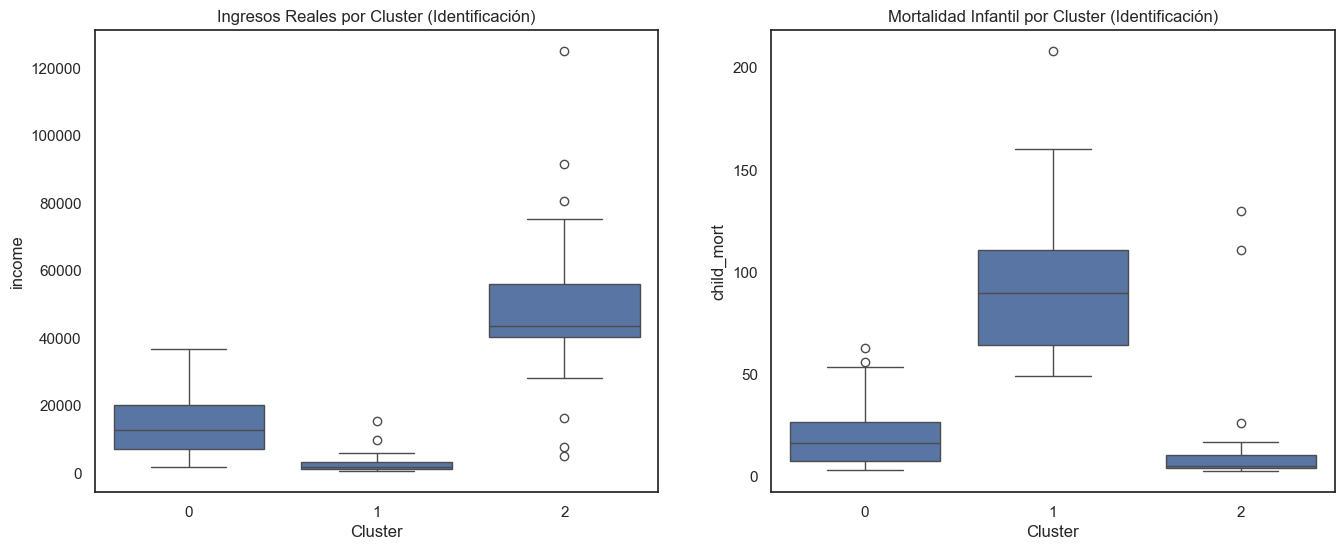

In [161]:
# Vamos a generar unos boxplots para ver la distribución de las variables income y child_mort en cada cluster para determinar el tipo de ayuda necesaria

# Añadimos los clusters al df original para ver valores reales
df['Cluster'] = Model.labels_

plt.figure(figsize=(16, 6))

# Boxplot de Ingresos por número de Cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='income', data=df)
plt.title('Ingresos Reales por Cluster (Identificación)')

# Boxplot de Mortalidad Infantil por número de Cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='child_mort', data=df)
plt.title('Mortalidad Infantil por Cluster (Identificación)')

plt.show()

<h5 style="color:rgba(35, 22, 223, 1);">========================================================================================</h5>

Gracias a los boxplots podemos ver claramente que tipo de ayuda tenemos que dar a cada cluster:
- Al cluster 1 hay que darle ayuda urgente, ya que tiene el ingreso neto (income) mas bajo de todos y la mortalidad infantil (child_mort) mas alta
- Al cluster 0 hay que darle ayuda moderada, ya que su ingreso neto es mejor que el del 1 y su mortalidad mas baja
- El cluster 2 no necesita ayuda, ya que tiene el ingreso neto mas alto de los tres y también la mortalidad mas baja de los tres

<h5 style="color:rgba(35, 22, 223, 1);">========================================================================================</h5>

In [162]:
# Vamos a visualizar con los colores que le pertoca a cada cluster según el tipo de ayuda que necesita

# Definimos los tipos de ayuda según el cluster a partir de los boxes anteriores
mapeo_ayuda = {
    1: 'Ayuda Urgente',
    0: 'Ayuda Moderada',
    2: 'No necesita ayuda'
}
df_cluster['Nivel de Ayuda'] = df_cluster['Cluster'].map(mapeo_ayuda)

# Definimos los colores asociados a las ETIQUETAS DE TEXTO
colores_niveles = {
    'Ayuda Urgente': 'red',
    'Ayuda Moderada': 'yellow',
    'No necesita ayuda': 'green'
}

fig = px.scatter_3d(
    df_cluster,
    x='Salud',
    y='Comercio',
    z='Finanzas',
    color='Nivel de Ayuda',                 # Color por cluster (clave)
    hover_name='Country',
    title='Clustering 3D de Países (KMeans, k=4)',
    opacity=0.75,
    color_discrete_map=colores_niveles
)

# --- MEJORAS DE VISIBILIDAD ---
fig.update_traces(
    marker=dict(
        size=6,
        line=dict(width=1.2, color='DarkSlateGrey')
    )
)

# --- CENTROIDES ---
fig.add_scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(
        size=12,
        color='black',
        symbol='diamond'
    ),
    name='Centroides'
)

# --- AJUSTES DE ESCENA ---
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        aspectmode='cube',
        xaxis_title='Eje Salud',
        yaxis_title='Eje Comercio',
        zaxis_title='Eje Finanzas',
        camera=dict(
            eye=dict(x=1.8, y=1.8, z=1.3)
        )
    ),
    template="plotly_white",
    legend_title_text='Cluster'
)

fig.show()

In [163]:
# Finalmente vamos a crear un mapa mundi que muestre la prioridad de asignación de recursos según el cluster asignado

# Creamos el mapa mundi
fig_mapa = px.choropleth(
    df_cluster,
    locations="Country",           # Columna con los nombres de los países
    locationmode="country names",  # Indica que use nombres para identificar la geografía
    color="Nivel de Ayuda",        # Variable que define el color
    hover_name="Country",          # Texto al pasar el ratón
    title="Mapa Global: Prioridad de Asignación de Recursos (ONG)",
    # Definimos colores manuales para que tengan sentido (Verde=Bien, Rojo=Urgente)
    color_discrete_map={
        'Ayuda Urgente': 'red',
        'Ayuda Moderada': 'yellow',
        'No necesita ayuda': 'green'
    },
    projection="natural earth"     # Estilo de mapa más profesional
)

# Ajustamos los estéticos finales
fig_mapa.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    legend_title_text='Prioridad de Ayuda'
)

# Mostrar en el notebook
fig_mapa.show()

# 4. Guardar como imagen estática usando Kaleido (requisito del enunciado)
fig_mapa.write_image("mapa_prioridad_ayuda.png")

C:\Users\marcr\AppData\Local\Temp\ipykernel_11860\2279207109.py:4: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



<h2 style="color:rgba(170, 78, 78, 1);">Conclusiones</h2>

<h5 style="color:rgba(35, 22, 223, 1);">========================================================================================</h5>

Se concluye lo siguiente en relación a la distribución de la ayuda que se tiene que repartir:
- Prioridad Absoluta (Cluster 1): Este grupo, que incluye países como Afganistán, Haití, Níger y la República Democrática del Congo, debe recibir un muy elevado porcentaje o incluso la totalidad de la recaudación conseguida. Tiene la combinación más crítica de bajos ingresos y alta mortalidad infantil (con una mediana cercana a 90 muertes por cada 1000).
- Prioridad Secundaria (Cluster 0): Países como Argentina, Egipto o Vietnam muestran una situación socioeconómica intermedia. Aunque son vulnerables, cuentan con una infraestructura de salud más robusta que los aleja de la urgencia inmediata.
- Sin Prioridad (Cluster 2): Países con ingresos elevados y mortalidad mínima (ej. Noruega, Suiza, Estados Unidos). Quedan excluidos de la ayuda.

<h5 style="color:rgba(35, 22, 223, 1);">========================================================================================</h5>

Algunas propuestas de mejora:
- Sub-segmentación del Cluster 1: Ya que este grupo tiene bastantes paises, recomendaria aplicar un sub-clustering interno para identificar los 5/10 países con las tasas de mortalidad infantil más extremas y así centrar allí el mayor porcentaje del dinero.
- Revisión de outliers para manejarlos de manera eficiente: Ya que hay algunos paises que, por localización y posición politica, no tiene mucho sentido que esten en un cluster o otro habria que realizar alguna acción para moverlos al grupo que les pertoca o tratarlos un poco diferente. (Como ejemplo simple, no creo que Nigeria, viendo como está rodeado por paises pobres, tenga que estar en el grupo de no ayuda).

<h5 style="color:rgba(35, 22, 223, 1);">========================================================================================</h5>